<a href="https://colab.research.google.com/github/amit17133129/STOCK-MARKET-PREDICTION-USING-RNN/blob/master/Stock_Market_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

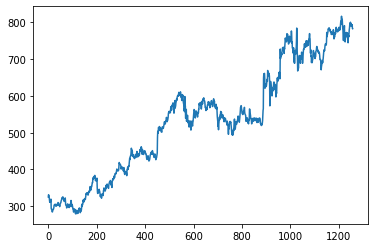

In [ ]:
data_train= pd.read_csv("/content/Google_Stock_Price_Train.csv")
data_train['Open'].plot()

In [ ]:
data_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [ ]:
real_stock_price = data_test[ ['Open'] ]

In [ ]:
a = data_train['Open']
b = np.array(a)
c = np.reshape(b, (-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [ ]:
training_data = sc.fit_transform(c)
training_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
len(training_data)

1258

In [ ]:
X_train = []
y_train = []

In [ ]:
for i in range(60, 1258):
  X_train.append(training_data[i-60:i, 0])
  y_train.append(training_data[i,0])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)

X_train :  (1198, 60)
y_train :  (1198,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
model = Sequential()

Using TensorFlow backend.


In [ ]:
model.add(LSTM(units=60, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

In [ ]:
model.layers

In [ ]:
model.add(LSTM(units = 60))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))
model.add(Dropout(0.2))

In [ ]:
model.layers

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0958
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0660
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0666
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0684
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0664
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0690
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0631
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0738
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0605
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0615
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0601
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - lo

In [ ]:
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(data_test['Open']) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

In [ ]:
import matplotlib.pyplot as plt

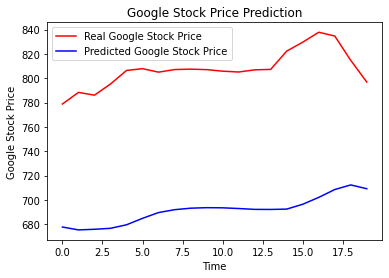

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()